Find the SVD of $A$, $UΣV^T$
, where $A =\begin{pmatrix}
3 &2  &2 \\ 
 2&3  &-2 
\end{pmatrix}$

In [10]:
u= np.array([[1/sqrt(2),1/sqrt(2)],
           [1/sqrt(2),-1/sqrt(2)]])
s= linalg.diagsvd([5,3],2,3)
v= np.array([[1/sqrt(2),1/sqrt(18),2/3],
             [1/sqrt(2),-1/sqrt(18),-2/3],
             [0,4/sqrt(18),-1/3]])
u,s,v

(array([[ 0.70710678,  0.70710678],
        [ 0.70710678, -0.70710678]]),
 array([[5, 0, 0],
        [0, 3, 0]]),
 array([[ 0.70710678,  0.23570226,  0.66666667],
        [ 0.70710678, -0.23570226, -0.66666667],
        [ 0.        ,  0.94280904, -0.33333333]]))

In [11]:
v.T

array([[ 0.70710678,  0.70710678,  0.        ],
       [ 0.23570226, -0.23570226,  0.94280904],
       [ 0.66666667, -0.66666667, -0.33333333]])

In [9]:
u@s@v.T

array([[ 3.,  2.,  2.],
       [ 2.,  3., -2.]])

In [1]:
from math import sqrt

In [2]:
import numpy as np
from scipy import linalg
A= np.array([[3,2,2],
             [2,3,-2]])
U,S,V= linalg.svd(A)
print('Ma trận U là :\n',U)
print('\n Vector giá trị Sigma là :\n',S)
print('\n Ma trận V chuyển vị là:\n',V)

Ma trận U là :
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

 Vector giá trị Sigma là :
 [5. 3.]

 Ma trận V chuyển vị là:
 [[ 7.07106781e-01  7.07106781e-01  3.88578059e-16]
 [-2.35702260e-01  2.35702260e-01 -9.42809042e-01]
 [-6.66666667e-01  6.66666667e-01  3.33333333e-01]]


In [3]:
U@linalg.diagsvd(S,2,3)@V

array([[ 3.,  2.,  2.],
       [ 2.,  3., -2.]])

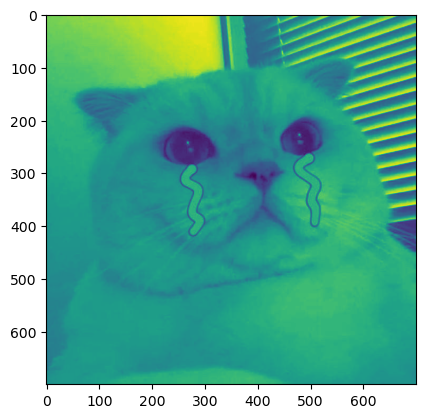

In [13]:
import matplotlib.pyplot as plt
plt.style.use('default')
import numpy as np
import scipy.linalg as ln
from PIL import Image
import urllib.request
from io import BytesIO


url = str('https://i.pinimg.com/736x/63/d4/c0/63d4c026c181357e6c08ada62db59b8b.jpg')
with urllib.request.urlopen(url) as url:
    f = BytesIO(url.read())

ig = np.array(Image.open(f))
#print('Image shape: %s'%str(ig.shape))
# Convert to grey
ig = ig.dot([0.299, 0.5870, 0.114])
plt.imshow(ig);

In [16]:
def SVD_pic(n_evl):
    """
    n_evl: number of highest eigenvalues taken
    """
    #Take m, n shape
    m = ig.shape[0]
    n = ig.shape[1]
    #Singular Value Decomposition
    U, S, V = ln.svd(ig) 
    #Get id position of n highest eigenvalues
    id_trunc = np.argsort(S)[::-1][:n_evl]
    #Extract matrix U_t, V_t, S_t
    U_t = U[np.ix_(np.arange(m), id_trunc)]
    V_t = V[np.ix_(id_trunc, np.arange(n))]
    S_diag = S[id_trunc]
    S_t = np.zeros((n_evl, n_evl))
    np.fill_diagonal(S_t, S_diag)
    #Return picture
    A = np.dot(U_t, S_t.dot(V_t))
    #Norm Frobenius
    fb = ln.norm(A-ig, 'fro')
    prt_retain = (1-fb**2/np.sum(S**2))*100
    plt.imshow(A)
    print('Phần trăm thông tin được giữa lại: %.2f%s \n'%(prt_retain, '%'))

Phần trăm thông tin được giữa lại: 99.44% 



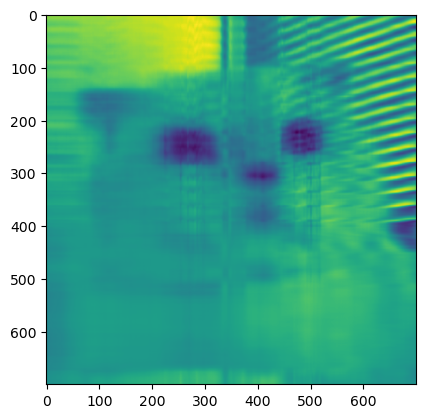

In [17]:
SVD_pic(10)

Phần trăm thông tin được giữa lại: 99.76% 



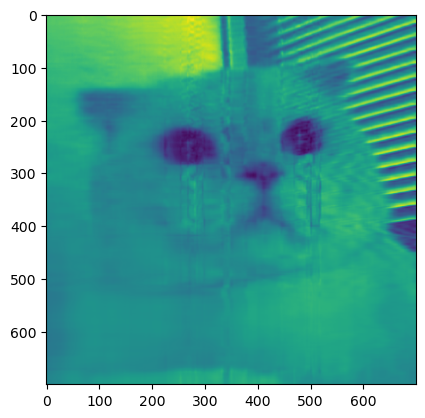

In [18]:
SVD_pic(20)

Phần trăm thông tin được giữa lại: 99.99% 



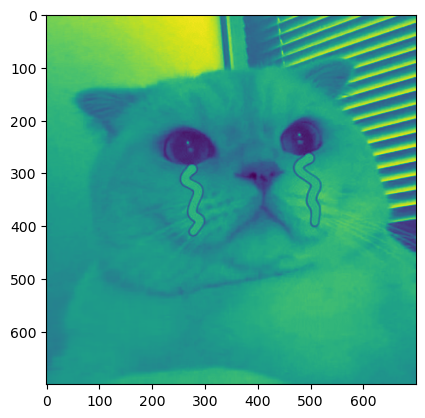

In [19]:
SVD_pic(100)